In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [2]:
def generate_data():
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    visualize(X,y)
    return X, y

def visualize(X, y):
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()

### Forward and backwork propagation

In [3]:
def pre_dataset(X):
    X_stacked = np.hstack([X, np.ones((X.shape[0], 1))])
    return X_stacked

In [4]:
def bp_network(X, y):
    num_classes = np.max(y) + 1
    hidden_layers_num = 5
    W1 = 0.001 * np.random.randn(X.shape[1], hidden_layers_num) # W1 (3,5)
    W2 = 0.001 * np.random.randn(hidden_layers_num, num_classes) # W2 (5,2)
    
    reg_lambda = 0.01
    iter_num = 1000
    epsilon = 0.01
    
    for i in range(iter_num):
        #Forward propagation
        z1 = X.dot(W1)
        a1 = np.tanh(z1)
        z2= a1.dot(W2)
        exp_scores = np.exp(z2)
        probs = (exp_scores / np.matrix(np.sum(exp_scores, axis=1)).T).getA()

        #Backpropagation
        delta3 = probs
        num_examples = X.shape[0]
        delta3[range(num_examples),y] -= 1
        dW2 = (a1.T).dot(delta3)
        delta2 = delta3.dot(W2.T) * (1-np.power(a1,2))
        dW1 = np.dot(X.T, delta2)

        #Add regularization terms
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        #Gradient descent parameter update
        W1 += -epsilon * dW1
        W2 += -epsilon * dW2
    return W1,W2

def predict(W1,W2,X):
    z1 = X.dot(W1)
    a1 = np.tanh(z1)
    z2= a1.dot(W2)
    exp_scores = np.exp(z2)
    probs = (exp_scores / np.matrix(np.sum(exp_scores, axis=1)).T).getA()
    return np.argmax(probs, axis=1)

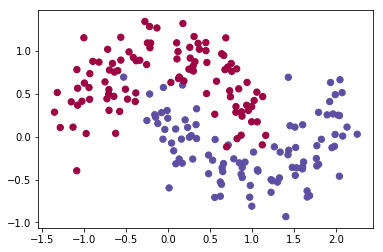

In [5]:
X_raw, y = generate_data()
X = pre_dataset(X_raw)

### 训练模型

In [6]:
W1, W2 = bp_network(X,y)
y_pred = predict(W1,W2,X)
print('acc:',np.mean(y_pred == y))

acc: 0.98


In [7]:
def raw_data_predict(X_raw):
    X  = np.hstack([X_raw, np.ones((X_raw.shape[0], 1))])
    return predict(W1,W2,X)

In [8]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()
def visualize_boundray(X, y, pred_func):
    plot_decision_boundary(lambda x: pred_func(x), X, y)

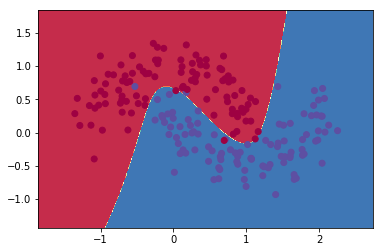

In [9]:
visualize_boundray(X, y, raw_data_predict)